# Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
X_train = np.load('../data/X_train.npy')
X_train_all_indices = np.load('../data/X_train_all_indices.npy')
# X_train_selected_indices = np.load('../data/X_train_selected_indices.npy')
y_train = np.load('../data/y_train.npy')

# Model Training

In [4]:
model = LinearRegression().fit(X_train, y_train)
model_all_indices = LinearRegression().fit(X_train_all_indices, y_train)
# model_selected_indices = LinearRegression().fit(X_train_selected_indices, y_train)

# Model Evaluation

In [5]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
# X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

In [6]:
y_pred = model.predict(X_test)
y_pred_all_indices = model_all_indices.predict(X_test_all_indices)
# y_pred_selected_indices = model_selected_indices.predict(X_test_selected_indices)

In [8]:
results = pd.DataFrame(columns=['Model', 'R^2', 'MAE'])
results.loc[0] = ['Linear Regression 10 Bands', model.score(X_test, y_test), mean_absolute_error(y_test, y_pred)]
results.loc[1] = ['Linear Regression All Indices', model_all_indices.score(X_test_all_indices, y_test), mean_absolute_error(y_test, y_pred_all_indices)]
# results.loc[2] = ['Linear Regression Selected Indices', model_selected_indices.score(X_test_selected_indices, y_test), mean_absolute_error(y_test, y_pred_selected_indices)]
results

,Model,R^2,MAE
0,Linear Regression 10 Bands,0.425713,6.367812
1,Linear Regression All Indices,0.520783,5.344201


## Visualization of True Labels vs. Predictions

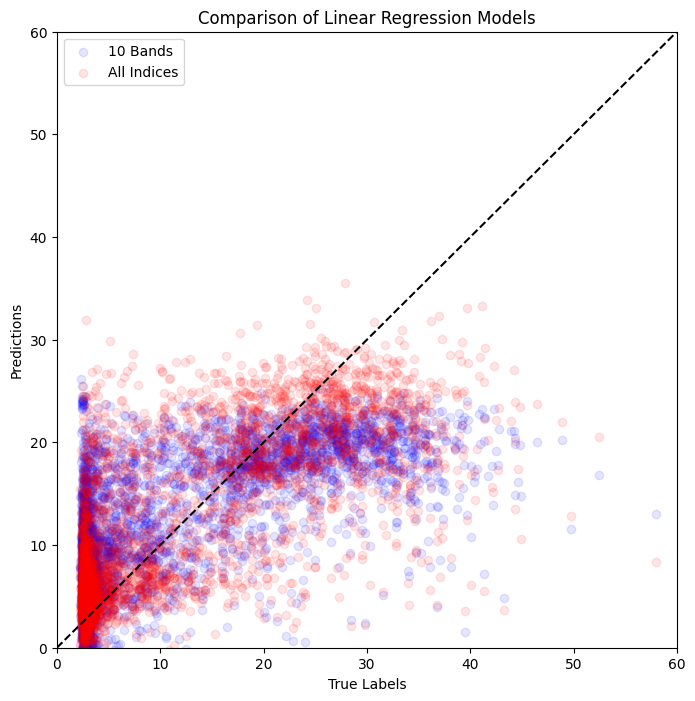

In [10]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, color="blue", alpha=0.1, label="10 Bands")
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1, label="All Indices")
# plt.scatter(y_pred_selected_indices, y_test, color="green", alpha=0.1, label="Selected Indices")
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Comparison of Linear Regression Models")
plt.legend()

plt.show()

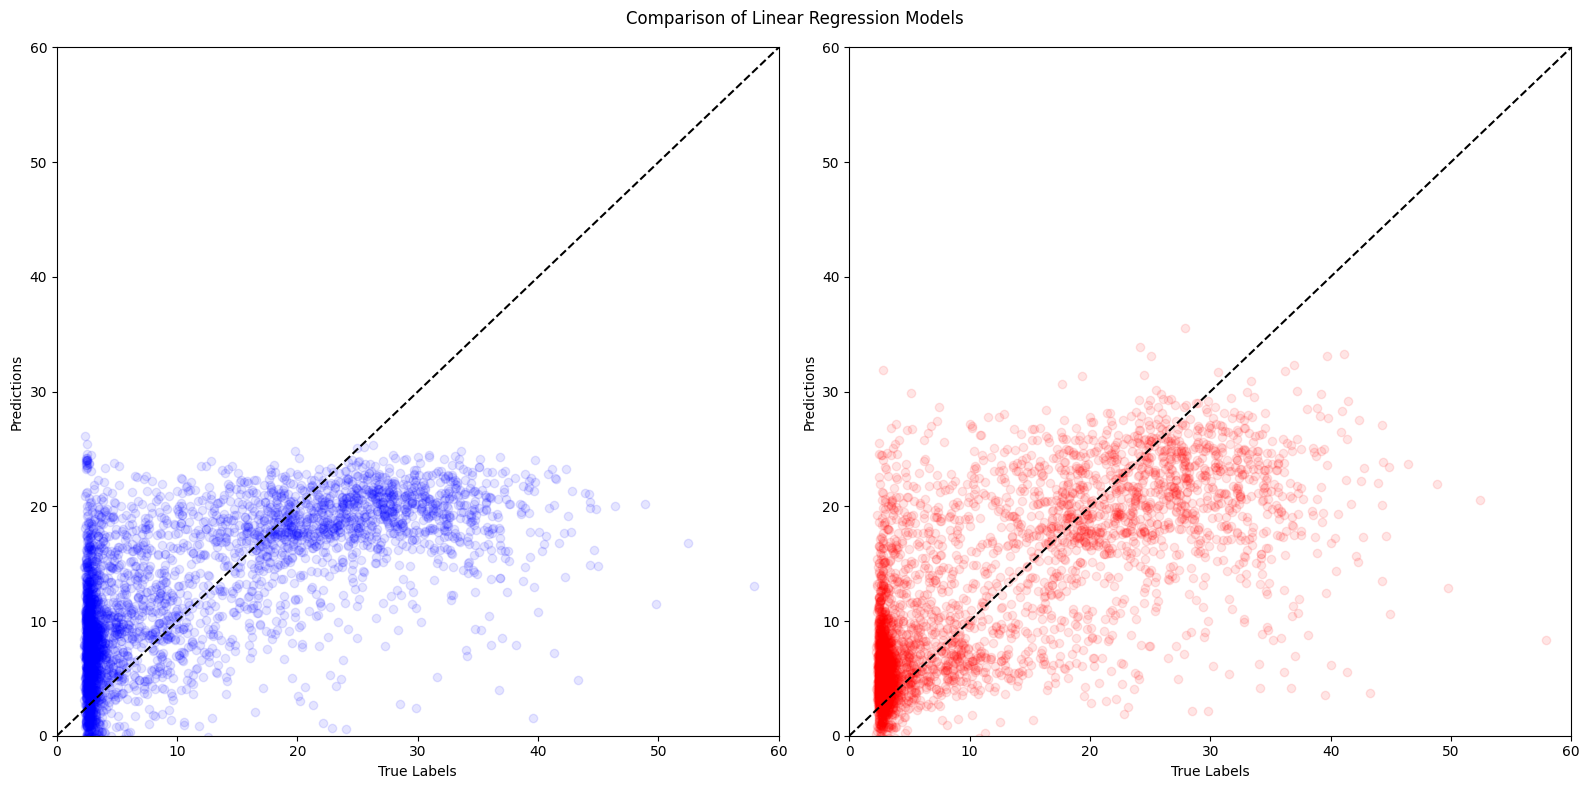

In [11]:
# Create a figure and specify the layout to have 1 row and 2 columns
fig = plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
# plt.sublot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
# plt.sublot(1, 3, 2)
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

# plt.subplot(1, 3, 3)
# plt.scatter(y_pred_selected_indices, y_test, color="green", alpha=0.1)
# plt.plot([0, 60], [0, 60], color='black', linestyle='--')
# plt.ylim([0, 60])
# plt.xlim([0, 60])
# plt.xlabel("True Labels")
# plt.ylabel("Predictions")

plt.suptitle("Comparison of Linear Regression Models")
plt.tight_layout()
plt.show()